In [24]:

from PIL import Image
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

import torch
import torchvision.transforms as T


plt.rcParams["savefig.bbox"] = 'tight'
orig_img = Image.open("/home/ec2-user/SageMaker/data/rice-diseases-image-dataset/Transformed-RiceDiseaseDataset/train/LeafBlast/340.jpg")
#orig_img = Image.open("/home/ec2-user/SageMaker/data/rice-diseases-image-dataset/RiceDiseaseDataset/train/LeafBlast/IMG_20190419_105609.jpg")
# if you change the seed, make sure that the randomly-applied transforms
# properly show that the image can be both transformed and *not* transformed!
torch.manual_seed(0)

print(orig_img)

def plot(imgs, with_orig=True, row_title=None, **imshow_kwargs):
    if not isinstance(imgs[0], list):
        # Make a 2d grid even if there's just 1 row
        imgs = [imgs]

    num_rows = len(imgs)
    num_cols = len(imgs[0]) + with_orig
    fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, squeeze=False)
    for row_idx, row in enumerate(imgs):
        row = [orig_img] + row if with_orig else row
        for col_idx, img in enumerate(row):
            ax = axs[row_idx, col_idx]
            ax.imshow(np.asarray(img), **imshow_kwargs)
            ax.set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

    if with_orig:
        axs[0, 0].set(title='Original image')
        axs[0, 0].title.set_size(8)
    if row_title is not None:
        for row_idx in range(num_rows):
            axs[row_idx, 0].set(ylabel=row_title[row_idx])

    plt.tight_layout()

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=256x256 at 0x7FA03C334630>


In [ ]:
!pip install --upgrade torchvision torch torchaudio

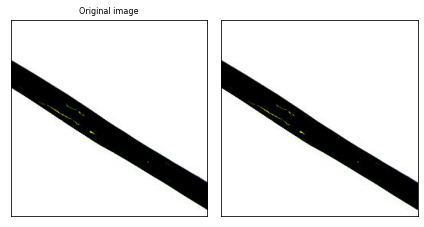

In [23]:
plot([orig_img])

In [13]:
import torch.nn as nn

transforms = torch.nn.Sequential(
    T.RandomCrop(224),
    T.RandomHorizontalFlip(p=0.3),
)

device = 'cuda' if torch.cuda.is_available() else 'cpu'
dog1 = dog1.to(device)
dog2 = dog2.to(device)

transformed_dog1 = transforms(dog1)
transformed_dog2 = transforms(dog2)
show([transformed_dog1, transformed_dog2])

TypeError: torchvision.transforms.transforms.RandomCrop is not a Module subclass